<a href="https://colab.research.google.com/github/larissavvsous/proj_int/blob/main/proj_integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Projeto Integrador I** </center>
## <center> Dupla: Larissa Sousa, Ruan Rodrigues</center>

### <center> Análise de sentimentos em comentários de supermercados de Itapajé: entendendo a opinião dos consumidores <center>


---


### Esse projeto consiste na realização uma análise de sentimento (NLP - processamento de linguagem natural) em avaliações e comentários referentes a três principais supermercados da cidade local, são eles: Deirton, Para Ty e Menor Preço.

> Link para apresentação: [texto do link](https://)


# Preprocessing

##### O mesmo tratamento que foi realizado no dataset `menor_preco`, foi o mesmo para os outros dois datasets. Por esse motivo, mostraremos o passo a passo somente no primeiro.

## Supermercado Menor preço

### Bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px

In [2]:
menorpreco = pd.read_csv("/content/menorpreco_bd.csv")
menorpreco

,TSUbDb,A503be,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,QV3IV,Aohxlc 2
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·
...,...,...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·


### Adicionando as notas

In [3]:
notas_mp = pd.read_csv("/content/notas_mp.csv")
notas_mp

,nota
0,1
1,2
2,5
3,5
4,5
...,...
180,5
181,5
182,4
183,3


In [4]:
menorpreco['nota'] = notas_mp['nota']
menorpreco

,TSUbDb,A503be,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,QV3IV,Aohxlc 2,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·,5
...,...,...,...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·,3


### Excluindo colunas irrelevantes

In [5]:
print(menorpreco.columns)

Index(['TSUbDb', 'A503be', 'dehysf', 'Jtu6Td', 'QWOdjf', 'QWOdjf 2', 'Txngnb',
       'Txngnb 2', 'QV3IV', 'Aohxlc 2', 'nota'],
      dtype='object')


In [6]:
menorpreco.drop("Txngnb 2", axis=1, inplace=True)
menorpreco.drop("Aohxlc 2", axis=1, inplace=True)
menorpreco.drop("QWOdjf 2", axis=1, inplace=True)

In [7]:
menorpreco

,TSUbDb,A503be,dehysf,Jtu6Td,QWOdjf,Txngnb,QV3IV,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,NaN,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,NaN,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,NaN,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5
...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,5
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,Local Guide,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,Local Guide,3


### Traduzindo os códigos das colunas para nomes

In [8]:
nome_colunas = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

menorpreco.rename(columns=nome_colunas, inplace=True)
menorpreco

,nome,A503be,periodo,comentario,quant_like_coment,feedback_super,local_guide,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,NaN,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,NaN,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,NaN,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5
...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,5
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,Local Guide,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,Local Guide,3


### Atribuindo valores às NAs

In [9]:
menorpreco['quant_like_coment'].fillna(0, inplace=True)

menorpreco['local_guide'].fillna("Not Local Guide", inplace=True)

menorpreco['comentario'].fillna("Sem comentário", inplace=True)

menorpreco['feedback_super'].fillna("Sem feedback", inplace=True)

menorpreco

,nome,A503be,periodo,comentario,quant_like_coment,feedback_super,local_guide,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,Not Local Guide,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,Not Local Guide,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,Not Local Guide,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5
...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5
181,Genival Viana,NaN,5 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,3


### Dividindo a coluna "A503be" em duas: **quantidade de comentarios** e **quantidade de fotos**

In [10]:
divisao = pd.DataFrame(menorpreco['A503be'])

divisao['quant_comentarios'] = divisao['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisao['quant_fotos'] = divisao['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisao[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   14            0
1                    8            0
2                   35            9
3                    3            0
4                   34           79
..                 ...          ...
180                  0            0
181                  0            0
182                339          102
183                 16            0
184                 20            3

[185 rows x 2 columns]


### Adicionando as colunas **quantidade de comentarios** e **quantidade de fotos** no dataset original

In [11]:
menorpreco = pd.concat([menorpreco, divisao[['quant_comentarios', 'quant_fotos']]], axis=1)

### Excluindo a coluna antiga "A503be"

In [12]:
menorpreco.drop("A503be", axis=1, inplace=True)

In [13]:
menorpreco

,nome,periodo,comentario,quant_like_coment,feedback_super,local_guide,nota,quant_comentarios,quant_fotos
0,Joyce Costa,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,Not Local Guide,1,14,0
1,Myname Gondim,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,Not Local Guide,2,8,0
2,Francisco Messias Barbosa de Lima,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5,35,9
3,Igor Sousa,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,Not Local Guide,5,3,0
4,INTELIGENCIA ARTIFICIAL 2020,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5,34,79
...,...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,6 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5,0,0
181,Genival Viana,5 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5,0,0
182,Larissa Brioso,4 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,4,339,102
183,Ana Beatriz Cruz Rocha,3 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,3,16,0


### Criando duas colunas (**nome** e **endereço** do supermercado) para nos ajudar futuramente a analisar cada supermercado separadamente, quando juntarmos os dados de todos os supermercados.

In [14]:
menorpreco['supermercado'] = 'Menor preço'
menorpreco['rua_supermercado'] = 'Manoel Luís da Rocha, 87'

In [15]:
df_menorpreco = menorpreco

### Salvando o dataset

In [16]:
df_menorpreco.to_csv("menorpreco_tratado.csv")

# Supermercado Para Ty

In [17]:
paraty = pd.read_csv("/content/paraty_bd.csv")
paraty

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,Aohxlc 2
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,NaN,NaN,NaN
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,·
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Adicionando as notas

notas_p = pd.read_csv("/content/notas_p.csv")
notas_p

,nota
0,5
1,4
2,5
3,5
4,5
...,...
359,5
360,3
361,3
362,5


In [19]:
paraty['nota'] = notas_p['nota']
paraty

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,Aohxlc 2,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,5
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,·,5
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN,5
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,5
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,3
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,3
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,5


In [20]:
print(paraty.columns)

Index(['TSUbDb', 'A503be', 'QV3IV', 'dehysf', 'Jtu6Td', 'QWOdjf', 'QWOdjf 2',
       'Txngnb', 'Txngnb 2', 'Aohxlc 2', 'nota'],
      dtype='object')


In [21]:
paraty.drop("Txngnb 2", axis=1, inplace=True)
paraty.drop("Aohxlc 2", axis=1, inplace=True)
paraty.drop("QWOdjf 2", axis = 1, inplace=True)
paraty

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,Txngnb,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,5
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,3
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,3
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,5


In [22]:
novas_colunasp = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

paraty.rename(columns=novas_colunasp, inplace=True)
paraty

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,5
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,3
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,3
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,5


In [23]:
paraty['quant_like_coment'].fillna(0, inplace=True)

paraty['local_guide'].fillna("Not Local Guide", inplace=True)

paraty['comentario'].fillna("Sem comentário", inplace=True)

paraty['feedback_super'].fillna("Sem feedback", inplace=True)

paraty

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5
1,Jane Meire,3 comentários6 fotos,Not Local Guide,3 semanas atrás,Sem comentário,0.0,Sem feedback,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5
3,Valmy Mendes,4 comentários2 fotos,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5
4,Fabio Teles Cruz Fabio,NaN,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5
...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5
360,Valeska Mesquita,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3
361,Zuila de sousa,8 comentários6 fotos,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3
362,Vanderli Barbosa Pinto,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5


In [24]:
divisaop = pd.DataFrame(paraty['A503be'])

divisaop['quant_comentarios'] = divisaop['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisaop['quant_fotos'] = divisaop['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaop[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   10            0
1                    3            6
2                   10           12
3                    4            2
4                    0            0
..                 ...          ...
359                  7            0
360                  0            0
361                  8            6
362                  0            0
363                155           18

[364 rows x 2 columns]


In [25]:
paraty = pd.concat([paraty, divisaop[['quant_comentarios', 'quant_fotos']]], axis=1)

In [26]:
paraty

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5,10,0
1,Jane Meire,3 comentários6 fotos,Not Local Guide,3 semanas atrás,Sem comentário,0.0,Sem feedback,4,3,6
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5,10,12
3,Valmy Mendes,4 comentários2 fotos,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5,4,2
4,Fabio Teles Cruz Fabio,NaN,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5,0,0
...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0
360,Valeska Mesquita,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0
361,Zuila de sousa,8 comentários6 fotos,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6
362,Vanderli Barbosa Pinto,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0


In [27]:
paraty.drop("A503be", axis=1, inplace=True)

In [28]:
paraty['supermercado'] = 'Paraty'
paraty['rua_supermercado'] = 'Bacharel José Airton Rocha, 1655'
df_paraty = paraty

In [29]:
df_paraty.to_csv("paraty_tratado.csv")

# Deirton

In [30]:
deirton = pd.read_csv("/content/deirton_bd.csv")

deirton

,TSUbDb,A503be,QV3IV,Aohxlc 2,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,·,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,·,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
2,Denis sousa,24 comentários4 fotos,Local Guide,·,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
3,Paulo Vitor,38 comentários13 fotos,Local Guide,·,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,·,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
...,...,...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,NaN,3 anos atrás,NaN,NaN,NaN,NaN,NaN
791,Gleice Teixeira,11 fotos,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN
792,Maria Lucia,3 comentários,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN
793,auricelia. silva,Um comentário,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN


In [31]:
# Adicionando as notas

notas_d = pd.read_csv("/content/notas_d.csv")
notas_d

,nota
0,3
1,5
2,4
3,5
4,5
...,...
790,5
791,5
792,5
793,5


In [32]:
deirton['nota'] = notas_d['nota']
deirton

,TSUbDb,A503be,QV3IV,Aohxlc 2,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,·,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,·,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,·,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,·,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,·,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,5
...,...,...,...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,NaN,3 anos atrás,NaN,NaN,NaN,NaN,NaN,5
791,Gleice Teixeira,11 fotos,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,5
792,Maria Lucia,3 comentários,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN,5
793,auricelia. silva,Um comentário,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN,5


In [33]:
print(deirton.columns)

Index(['TSUbDb', 'A503be', 'QV3IV', 'Aohxlc 2', 'dehysf', 'Jtu6Td', 'QWOdjf',
       'QWOdjf 2', 'Txngnb', 'Txngnb 2', 'nota'],
      dtype='object')


In [34]:
deirton.drop("Aohxlc 2", axis=1, inplace=True)
deirton.drop("QWOdjf 2", axis=1, inplace=True)
deirton.drop("Txngnb 2", axis=1, inplace=True)

In [35]:
deirton

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,Txngnb,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5
...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,3 anos atrás,NaN,NaN,NaN,5
791,Gleice Teixeira,11 fotos,NaN,4 anos atrás,NaN,NaN,NaN,5
792,Maria Lucia,3 comentários,NaN,2 anos atrás,NaN,NaN,NaN,5
793,auricelia. silva,Um comentário,NaN,2 anos atrás,NaN,NaN,NaN,5


In [36]:
nome_colunas_d = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

deirton.rename(columns=nome_colunas_d, inplace=True)
deirton

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5
...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,3 anos atrás,NaN,NaN,NaN,5
791,Gleice Teixeira,11 fotos,NaN,4 anos atrás,NaN,NaN,NaN,5
792,Maria Lucia,3 comentários,NaN,2 anos atrás,NaN,NaN,NaN,5
793,auricelia. silva,Um comentário,NaN,2 anos atrás,NaN,NaN,NaN,5


In [37]:
deirton['quant_like_coment'].fillna(0, inplace=True)

deirton['local_guide'].fillna("Not Local Guide", inplace=True)

deirton['comentario'].fillna("Sem comentário", inplace=True)

deirton['feedback_super'].fillna("Sem feedback", inplace=True)

deirton

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5
...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback,5
791,Gleice Teixeira,11 fotos,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5
792,Maria Lucia,3 comentários,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5
793,auricelia. silva,Um comentário,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5


In [38]:
divisaod = pd.DataFrame(deirton['A503be'])

divisaod['quant_comentarios'] = divisaod['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisaod['quant_fotos'] = divisaod['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaod[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   17           12
1                   14           15
2                   24            4
3                   38           13
4                    6           16
..                 ...          ...
790                  0            0
791                  0           11
792                  3            0
793                  0            0
794                  3            0

[795 rows x 2 columns]


In [39]:
deirton = pd.concat([deirton, divisaod[['quant_comentarios', 'quant_fotos']]], axis=1)

In [40]:
deirton.drop("A503be", axis=1, inplace=True)
deirton

,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos
0,Fernando Gleibe,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12
1,Ana Carolina Teixeira Bastos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15
2,Denis sousa,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4
3,Paulo Vitor,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13
4,Ricardo Nascimento,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16
...,...,...,...,...,...,...,...,...,...
790,Davi Reis,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0
791,Gleice Teixeira,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,11
792,Maria Lucia,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5,3,0
793,auricelia. silva,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0


In [41]:
deirton['supermercado'] = 'Deirton'
deirton['rua_supermercado'] = 'Fausto Pinheiro, 316'
df_deirton = deirton

In [42]:
df_deirton.to_csv("deirton_tratado.csv")

# Juntando os 3 supermercados

In [43]:
d = pd.read_csv("/content/deirton_tratado.csv")
mp = pd.read_csv("/content/menorpreco_tratado.csv")
p = pd.read_csv("/content/paraty_tratado.csv")
supermercados = pd.concat([d, mp, p])

supermercados

,Unnamed: 0,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado
0,0,Fernando Gleibe,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316"
1,1,Ana Carolina Teixeira Bastos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316"
2,2,Denis sousa,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316"
3,3,Paulo Vitor,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316"
4,4,Ricardo Nascimento,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316"
...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,Tainara Cruz de sousa,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655"
360,360,Valeska Mesquita,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655"
361,361,Zuila de sousa,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655"
362,362,Vanderli Barbosa Pinto,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655"


In [44]:
mapping = {'Local Guide': 'Sim', 'Not Local Guide': 'Não'}

supermercados['guia_local'] = supermercados['local_guide'].replace(mapping)


In [45]:
supermercados

,Unnamed: 0,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local
0,0,Fernando Gleibe,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim
1,1,Ana Carolina Teixeira Bastos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim
2,2,Denis sousa,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim
3,3,Paulo Vitor,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim
4,4,Ricardo Nascimento,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,Tainara Cruz de sousa,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
360,360,Valeska Mesquita,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
361,361,Zuila de sousa,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não
362,362,Vanderli Barbosa Pinto,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não


In [46]:
supermercados = supermercados.drop("Unnamed: 0", axis=1)
supermercados = supermercados.drop("local_guide", axis=1)

In [47]:
supermercados

,nome,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local
0,Fernando Gleibe,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim
1,Ana Carolina Teixeira Bastos,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim
2,Denis sousa,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim
3,Paulo Vitor,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim
4,Ricardo Nascimento,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim
...,...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
360,Valeska Mesquita,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
361,Zuila de sousa,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não
362,Vanderli Barbosa Pinto,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não


### Contagem de pessoas que não comentaram (geral)

In [48]:
contagemg = supermercados['comentario'].value_counts().get('Sem comentário', 0)

print(f"Número de pessoas que não comentaram: {contagemg}")

Número de pessoas que não comentaram: 749


### Trocando nomes dos clientes por ID

In [49]:
contagem_clientes = supermercados['nome'].value_counts()
contagem_clientes.head(15)

Alexandrina Mesquita            4
Fabio Mesquita                  4
Cleumyr Ramos                   4
Anderson Silva                  3
Isabelita Lopes Cruz Lopes      3
Rita Mesquita                   3
Ana Beatriz Cruz Rocha          3
Memes Supremos                  3
Madson Dos Santos               3
Kennedy Costa                   3
Eduardo Camelo                  3
furia da luz                    3
josé carlos pereira da cunha    3
Arianne Aragão                  3
rurik alves                     3
Name: nome, dtype: int64

In [50]:
unique_clientes = supermercados['nome'].unique()
cliente_id_mapping = {client: idx for idx, client in enumerate(unique_clientes)}

supermercados['cliente_id'] = supermercados['nome'].map(cliente_id_mapping)

In [51]:
contagem_id = supermercados['cliente_id'].value_counts()
contagem_id.head(15)

716    4
139    4
573    4
205    3
297    3
571    3
66     3
60     3
350    3
55     3
681    3
182    3
210    3
377    3
47     3
Name: cliente_id, dtype: int64

In [52]:
supermercados = supermercados.drop("nome", axis=1)

In [53]:
supermercados

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4
...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872


In [54]:
supermercados.to_csv("3supermercados.csv")

In [55]:
aleat_10_linhas = supermercados.sample(n=12, random_state=1)

aleat_10_linhas

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id
772,2 anos atrás,Sem comentário,0.0,Sem feedback,3,2,2,Deirton,"Fausto Pinheiro, 316",Não,767
258,3 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Sim,463
111,2 anos atrás,Ótimo lugar pra fazer suas compras...,0.0,Agradecemos sua ajuda.,5,6,0,Deirton,"Fausto Pinheiro, 316",Não,111
503,3 anos atrás,Sem comentário,0.0,Sem feedback,4,58,107,Deirton,"Fausto Pinheiro, 316",Sim,501
303,3 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,1047
73,um ano atrás,Sem comentário,0.0,Sem feedback,4,5,0,Paraty,"Bacharel José Airton Rocha, 1655",Sim,918
159,5 anos atrás,Comodidade e conforto a um preço acessível.,0.0,Agradecemos sua ajuda.,5,3,0,Deirton,"Fausto Pinheiro, 316",Não,159
549,5 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Deirton,"Fausto Pinheiro, 316",Não,547
156,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Menor preço,"Manoel Luís da Rocha, 87",Não,872
201,10 meses atrás,Ótima,0.0,Agradecemos sua ajuda.,1,3,0,Deirton,"Fausto Pinheiro, 316",Não,201


### Remoção de stopwords

### Pré-tratamento de texto: remoção de stopwords (preposições, artigos etc), tokenização.

- utilizando NLTK

##### Stopwords são palavras que podem ser consideradas irrelevantes para o entedimento do sentido de um texto, ou seja, palavras semanticamente irrelavantes. Exemplos: as, e, os, de, para, com, sem, foi. Essas palavras são geralmente removidas de um texto durante a fase de pré-processamento. O NLTK possui uma lista de stopwords para o Português:

In [56]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

print("\nAlguns exemplos: ", stopwords[:10])

print("\nQuantidade de stopwords: ", len(stopwords))

print("\nO artigo 'a' pertence ao stopword?")
print('a' in stopwords)

print("\nA palavra 'chico' pertence ao stopword?")
print('chico' in stopwords)


Alguns exemplos:  ['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']

Quantidade de stopwords:  207

O artigo 'a' pertence ao stopword?
True

A palavra 'chico' pertence ao stopword?
False


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [57]:
# Função para remover stopwords, exceto comentários que tenham o label "sem comentário"
def remove_stopwords(text, label):
    if label != 'Sem comentário':
        words = text.split()
        words = [word for word in words if word.lower() not in stopwords]
        return ' '.join(words)
    return text

# Aplica a função a cada linha da coluna "comentario" e da coluna "label"
supermercados['comentario_sem_stopwords'] = supermercados.apply(lambda row: remove_stopwords(row['comentario'], row['comentario']), axis=1)
supermercados

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil ci..."
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,supermercado conta produtos variados boa relaç...
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diver..."
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,Supermercado Excelente realizar compras rotine...
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade
...,...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306,Principal
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411,Sem comentário
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500,Sem comentário
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872,Sem comentário


### Remoção de pontuação




In [58]:
# Função para remover pontuação
def remove_pontuacao(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

# Aplica a função a cada linha da coluna "comentario_sem_stopwords"
supermercados['comentario_sem_pontuacao'] = supermercados['comentario_sem_stopwords'].apply(remove_pontuacao)
supermercados

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords,comentario_sem_pontuacao
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil ci...",compras presenciais maior melhor mercantil cid...
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,supermercado conta produtos variados boa relaç...,supermercado conta produtos variados boa relaç...
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diver...",momento maior mercantil cidadecom muita divers...
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,Supermercado Excelente realizar compras rotine...,Supermercado Excelente realizar compras rotine...
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade,Ótimo atendimento Promoções variedade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306,Principal,Principal
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411,Sem comentário,Sem comentário
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500,Sem comentário,Sem comentário
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872,Sem comentário,Sem comentário


### Tokenização

##### O `NLTK` também possui módulos para tokenização. Podemos tokenizar uma sequência de caracteres utilizando o método `.word_tokenize(string)`:


In [59]:
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text, language='portuguese')

# Aplica a função de tokenização a cada linha da coluna "comentario_sem_stopwords"
supermercados['comentario_tokens'] = supermercados['comentario_sem_pontuacao'].apply(tokenize_text)
supermercados

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords,comentario_sem_pontuacao,comentario_tokens
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil ci...",compras presenciais maior melhor mercantil cid...,"[compras, presenciais, maior, melhor, mercanti..."
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,supermercado conta produtos variados boa relaç...,supermercado conta produtos variados boa relaç...,"[supermercado, conta, produtos, variados, boa,..."
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diver...",momento maior mercantil cidadecom muita divers...,"[momento, maior, mercantil, cidadecom, muita, ..."
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,Supermercado Excelente realizar compras rotine...,Supermercado Excelente realizar compras rotine...,"[Supermercado, Excelente, realizar, compras, r..."
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade,Ótimo atendimento Promoções variedade,"[Ótimo, atendimento, Promoções, variedade]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306,Principal,Principal,[Principal]
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411,Sem comentário,Sem comentário,"[Sem, comentário]"
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500,Sem comentário,Sem comentário,"[Sem, comentário]"
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872,Sem comentário,Sem comentário,"[Sem, comentário]"


### Nuvem de palavras

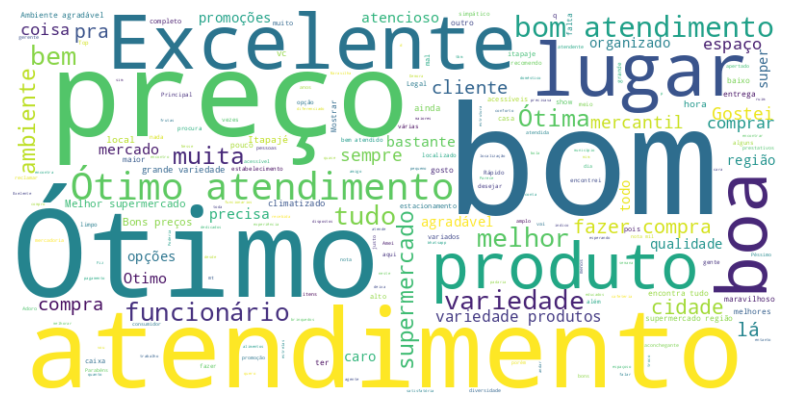

In [60]:
supermercados = supermercados[~supermercados['comentario_sem_pontuacao'].str.contains("Sem comentário")]

palavras = ' '.join(supermercados['comentario_sem_pontuacao'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200, stopwords=None).generate(palavras)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Ranking de 20 palavras

In [61]:
tokens = supermercados['comentario_sem_stopwords']

# Concatena todas as listas de palavras em uma única lista e remove espaços
todas_palavras = ''.join([palavra for lista_tokens in tokens for palavra in lista_tokens])

# Remove as stopwords
stop_words = set(stopwords)
todas_palavras = ' '.join([palavra for palavra in todas_palavras.split() if palavra.lower() not in stop_words])

# Calcula a contagem de cada palavra
contagem_palavras = Counter(todas_palavras.split())

# Obtém as 20 palavras mais frequentes
ranking_20_palavras = contagem_palavras.most_common(20)

# Exibe o ranking
for i, (palavra, frequencia) in enumerate(ranking_20_palavras, start=1):
    print(f"{i}. {palavra}: {frequencia} vezes")



1. atendimento: 37 vezes
2. bom: 34 vezes
3. preços: 30 vezes
4. bem: 23 vezes
5. lugar: 20 vezes
6. variedade: 19 vezes
7. ótimo: 19 vezes
8. fazer: 18 vezes
9. preço: 16 vezes
10. compras: 15 vezes
11. supermercado: 15 vezes
12. pra: 15 vezes
13. produtos: 14 vezes
14. funcionários: 14 vezes
15. ambiente: 14 vezes
16. tudo: 13 vezes
17. mercantil: 10 vezes
18. atendimento,: 10 vezes
19. variedades: 10 vezes
20. bastante: 9 vezes


In [62]:
import plotly.express as px
import pandas as pd
from collections import Counter

# Seu código para processar as palavras e calcular a contagem permanece o mesmo

# Palavras a serem excluídas
palavras_a_excluir = ['pra', 'atendimento']

# Exclui as palavras especificadas da contagem
ranking_20_palavras_sem_excluir = [item for item in ranking_20_palavras if item[0] not in palavras_a_excluir]

# Cria um DataFrame com os dados ajustados
df = pd.DataFrame(ranking_20_palavras_sem_excluir, columns=['Palavra', 'Frequência'])

# Cria o gráfico de barras
fig = px.bar(df, x='Palavra', y='Frequência', title='Top 20 Palavras Mais Frequentes')
fig.update_layout(xaxis_title='Palavra', yaxis_title='Frequência')

# Exibe o gráfico
fig.show()




### Distribuição das notas

In [67]:
fig = px.histogram(supermercados['nota'], nbins=10, title='Histograma das Notas', labels={'value': 'Notas', 'count': 'Frequência'})
fig.show()

#### Para o readme do git

In [66]:
  # Visualizando as primeiras linhas do dataset '3supermercados'
  print("\nPrimeiras linhas do dataset:\n", supermercados.head())

  # Uma breve análise descritiva
  estatisticas_descritivas = supermercados.describe()

  # Contagem de valores únicos em uma coluna específica
  valores_unicos = supermercados['supermercado'].value_counts()

  # Visualizar as estatísticas descritivas
  print("\nEstatísticas descritivas:\n", estatisticas_descritivas)
  print("\nContagem de valores únicos nos supermercados:\n", valores_unicos)


Primeiras linhas do dataset:
          periodo                                         comentario  \
0   um mês atrás  Nas compras presenciais, é o maior e melhor me...   
1  4 meses atrás  O supermercado conta com produtos variados e b...   
2  3 meses atrás  Até o momento o maior mercantil da cidade,com ...   
3  5 meses atrás  Supermercado Excelente para realizar suas comp...   
4  3 meses atrás           Ótimo atendimento. Promoções e variedade   

   quant_like_coment          feedback_super  nota  quant_comentarios  \
0                0.0  Agradecemos sua ajuda.     3                 17   
1                0.0  Agradecemos sua ajuda.     5                 14   
2                0.0  Agradecemos sua ajuda.     4                 24   
3                0.0  Agradecemos sua ajuda.     5                 38   
4                0.0  Agradecemos sua ajuda.     5                  6   

   quant_fotos supermercado      rua_supermercado guia_local  cliente_id  \
0           12      Deirton